In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re
import nltk
nltk.download("punkt")
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.svm import LinearSVC
from nltk.stem import wordnet
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kailashbalachandiran/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kailashbalachandiran/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/kailashbalachandiran/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
# Importing libraries and functions
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from numpy import array
#from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import stats

In [3]:
df_train = pd.read_csv("Tweets_train (2).csv")
df_test = pd.read_csv("Tweets_test (1) (1).csv", encoding="latin-1")
df_dev = pd.read_csv("Tweets_dev (1).csv")

In [4]:
df_train.pop("tweet_id")

0        569179849518161920
1        569835751275433984
2        568588936852799488
3        569525116725567491
4        568807823187976193
                ...        
11853    570123872168574976
11854    570063683256242177
11855    568032524749942784
11856    569705813142409217
11857    569976114124349440
Name: tweet_id, Length: 11858, dtype: int64

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11858 entries, 0 to 11857
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               11858 non-null  object
 1   airline_sentiment  11858 non-null  object
dtypes: object(2)
memory usage: 185.4+ KB


In [6]:
df_train.shape

(11858, 2)

In [7]:
percent_missing = round(df_train.isnull().sum()/len(df_train)*100,2)
print(percent_missing)

text                 0.0
airline_sentiment    0.0
dtype: float64


In [8]:
#!pip install tensorflow
import tensorflow.keras
from tensorflow import keras
from keras.preprocessing.text import one_hot,Tokenizer
from keras_preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM
from sklearn.model_selection import train_test_split

                   text
airline_sentiment      
negative           7434
neutral            2510
positive           1914


[Text(0, 0, 'Negative'), Text(1, 0, 'Positive'), Text(2, 0, 'Neutral')]

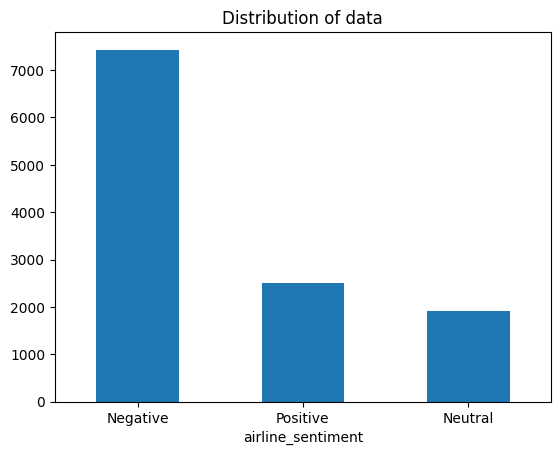

In [9]:
print(df_train.groupby('airline_sentiment').count())
plot_target = df_train.groupby('airline_sentiment').count().plot(kind='bar', title='Distribution of data',legend=False)
plot_target.set_xticklabels(['Negative','Positive','Neutral'], rotation=0)

In [10]:
text, sentiment = list(df_train['text']), list(df_train['airline_sentiment'])
#NLP - Stopword removal
test_text, test_sentiment = list(df_test['text']),list(df_test['airline_sentiment'])
dev_text, dev_sentiment = list(df_dev['text']),list(df_dev['airline_sentiment'])

In [11]:
snowball = SnowballStemmer(language='english')
word_lemma = WordNetLemmatizer()
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
nlp = [] 
pun=[]  
url=[]
lem =[]
#stop_words = [word for word in text.split() if word.lower() not in ENGLISH_STOP_WORDS]
def NLP(text):
  
  for sent in text:
    redef1 = ""
    #print(sent)
    wordlist = sent.split()
    for word in wordlist:
      if (word.lower() not in ENGLISH_STOP_WORDS):
        if redef1=="":
          redef1=word
        else:  
          redef1 = redef1 + " " + word

        #print(redef1)
        """print("length of old data:", len(text))
        print("length of new data:", len(redef1))"""
    
    nlp.append(redef1)
# Removing Punctuation  
def PUNC(nlp):
  for rem in nlp:
    redef2=" "
    clean2 = re.sub("[^A-Za-z ]", "" , rem)
    pun.append(clean2)

def URL(pun):
  for content in pun:
    clean3 = re.sub('http\S+', '', content) #replaces string which does not contains any white space characters and starts with http
    url.append(clean3)

#Tokenisation Lemma Stem
def Gram(url):
  for sentence in url: #token
    #tokens = word_tokenize(sentence)
    onesent = " "
    #for eachword in sentence:
    stemmed = snowball.stem(sentence.lower())
    lemmatized = word_lemma.lemmatize(stemmed)
    #  onesent = onesent + " " + lemmatized
    lem.append(lemmatized)

    

print(type(text))
NLP(text)
PUNC(nlp)
nlp.clear()
URL(pun)
pun.clear()
Gram(url)
url.clear()
#model_Data = df_train[['text','airline_sentiment']]
#print("ype is",type(lem))
#print(lem)
df_train['protext']=lem
#dataset = [['protext'],data['airline_sentiment']]

# TRAIN DATA
x_train = df_train.protext
y = df_train.airline_sentiment
y_train = np.array(list(map(lambda x: 1 if x=="positive" else (2 if x=='negative' else 0),y)))
print("data in y is:",y_train)

lem.clear()
#print(type(test_text))
NLP(test_text)
PUNC(nlp)
nlp.clear()
URL(pun)
pun.clear()
Gram(url)
url.clear()
df_test['protext']=lem
#TEST DATA
x_test = df_test.protext
#print(test_data)
test_target = df_test.airline_sentiment
y_test = np.array(list(map(lambda x: 1 if x=="positive" else (2 if x=='negative' else 0),test_target)))
lem.clear()

NLP(dev_text)
PUNC(nlp)
nlp.clear()
URL(pun)
pun.clear()
Gram(url)
url.clear()
df_dev['protext']=lem
lem.clear()

x_dev = df_dev.protext
y_dev = df_dev.airline_sentiment

print(x_dev)

<class 'list'>
data in y is: [1 2 1 ... 2 2 2]
0       southwestair great job celebrating mardigras  ...
1       southwestair thanks taking notch leinenkugels ...
2                 usairways hold hour completely unaccept
3                              united thank offer sorted 
4       jetblue wondering its possible colleague earli...
                              ...                        
1313    americanair sorry disappointed outoftouchwithr...
1314    americanair stuck plane dallas thats supposed ...
1315    united lost wallet flight  yesterday houston b...
1316    usairways travelling pwm atl sunday flight got...
1317                                  southwestair thank 
Name: protext, Length: 1318, dtype: object


In [12]:


word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(x_train)

X_train = word_tokenizer.texts_to_sequences(x_train)
X_test = word_tokenizer.texts_to_sequences(x_test)


vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

12409

In [13]:
from keras_preprocessing.sequence import pad_sequences
maxlen = 100
#print("before ",x_train)
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
#print("after", x_train)

In [14]:
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [15]:
embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
#print(embedding_matrix)
df = pd.DataFrame(embedding_matrix)
print(df)

            0         1        2        3        4         5         6    
0      0.00000  0.000000  0.00000  0.00000  0.00000  0.000000  0.000000  \
1      0.21733  0.561160  0.63062 -0.14130  0.61665 -0.414800 -0.024356   
2      0.12190 -0.656460  0.50855  0.14803 -0.45745  0.118270  0.460180   
3      0.17280  0.247460  0.22115  0.57265  0.13870 -0.025549  0.521060   
4      0.00000  0.000000  0.00000  0.00000  0.00000  0.000000  0.000000   
...        ...       ...      ...      ...      ...       ...       ...   
12404  0.00000  0.000000  0.00000  0.00000  0.00000  0.000000  0.000000   
12405 -0.43078 -0.081624  0.41119 -0.34523 -0.31086  1.001000 -0.054702   
12406 -0.30734  0.296040  0.52309 -0.87012 -0.36028  0.442840 -0.839620   
12407  0.00000  0.000000  0.00000  0.00000  0.00000  0.000000  0.000000   
12408 -0.13591 -0.449560  0.77170  0.37433  0.20394  0.358470 -0.384660   

             7         8        9   ...        90       91        92   
0      0.000000  0.000000  

In [ ]:
    # Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(df)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer()
#x_train = df_train.protext

vectoriser.fit(df_train.protext)
X = vectoriser.transform(df_train.protext)
z = vectoriser.transform(df_test.protext)
dev_data = vectoriser.transform(df_dev.protext)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))
lem.clear() 

No. of feature_words:  12382


In [30]:
# SUpport Vector Machine (Multi class classification)
from sklearn.metrics import classification_report,confusion_matrix

#from sklearn.metrics import roc_curve, auc
SVCmodel = LinearSVC()
SVCmodel.fit(X, y_train)

y_pred = SVCmodel.predict(z)

print("test results",accuracy_score(y_pred, y_test)*100)
print("confusion matrix")
cm = confusion_matrix(y_pred, y_test)
print(cm)
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred))

test results 78.34699453551912
confusion matrix
[[164  34  71]
 [ 40 155  19]
 [106  47 828]]
              precision    recall  f1-score   support

           0       0.61      0.53      0.57       310
           1       0.72      0.66      0.69       236
           2       0.84      0.90      0.87       918

    accuracy                           0.78      1464
   macro avg       0.73      0.70      0.71      1464
weighted avg       0.78      0.78      0.78      1464



In [31]:
# Naive bayes
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X,y_train)
# Predict the categories of the test data
predicted_categories = model.predict(z)
cm = confusion_matrix(predicted_categories, y_test)
print(cm)
#print("test results",accuracy_score(y_test, predicted_categories)*100)
print(classification_report(y_test , predicted_categories))

[[ 53   6   3]
 [  7  35   1]
 [250 195 914]]
              precision    recall  f1-score   support

           0       0.85      0.17      0.28       310
           1       0.81      0.15      0.25       236
           2       0.67      1.00      0.80       918

    accuracy                           0.68      1464
   macro avg       0.78      0.44      0.45      1464
weighted avg       0.73      0.68      0.60      1464



In [32]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
#X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.20)
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X, y)
rfc_pred = rfc.predict(z)
rfc_pred2 = rfc.predict(dev_data)

print("ACCURACY REPORT:")
print(classification_report(test_target,rfc_pred))
print("dev data:")
print(classification_report(y_dev,rfc_pred2))


ACCURACY REPORT:
              precision    recall  f1-score   support

    negative       0.78      0.94      0.85       918
     neutral       0.63      0.39      0.48       310
    positive       0.71      0.52      0.60       236

    accuracy                           0.75      1464
   macro avg       0.71      0.62      0.65      1464
weighted avg       0.74      0.75      0.73      1464

dev data:
              precision    recall  f1-score   support

    negative       0.76      0.94      0.84       826
     neutral       0.61      0.35      0.44       279
    positive       0.74      0.49      0.59       213

    accuracy                           0.74      1318
   macro avg       0.70      0.59      0.62      1318
weighted avg       0.73      0.74      0.72      1318



In [33]:
#lstm
# Neural Network architecture

lstm_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

lstm_model.add(embedding_layer)
lstm_model.add(LSTM(128))

lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
#print(lstm_model.summary())

lstm_model_history = lstm_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)
score = lstm_model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Epoch 1/6
75/75 [==============================] - 6s 43ms/step - loss: -5.6064 - acc: 0.1624 - val_loss: -9.2171 - val_acc: 0.1594
Epoch 2/6
75/75 [==============================] - 2s 29ms/step - loss: -11.5132 - acc: 0.1619 - val_loss: -13.4262 - val_acc: 0.1594
Epoch 3/6
75/75 [==============================] - 2s 30ms/step - loss: -15.6449 - acc: 0.1619 - val_loss: -17.4751 - val_acc: 0.1594
Epoch 4/6
75/75 [==============================] - 2s 29ms/step - loss: -19.7319 - acc: 0.1619 - val_loss: -21.4719 - val_acc: 0.1594
Epoch 5/6
75/75 [==============================] - 2s 29ms/step - loss: -23.7825 - acc: 0.1619 - val_loss: -25.4371 - val_acc: 0.1594
Epoch 6/6
46/46 [==============================] - 1s 10ms/step - loss: -29.9533 - acc: 0.1612
Test Score: -29.953277587890625
Test Accuracy: 0.16120219230651855


In [34]:
#Simple neural network
snn_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=True)

snn_model.add(embedding_layer)

snn_model.add(Flatten())
snn_model.add(Dense(65, activation='relu'))
snn_model.add(Dense(40, activation='relu'))
snn_model.add(Dense(3, activation='relu'))

In [35]:
snn_model.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['acc'])

print(snn_model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 100)          1240900   
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_6 (Dense)             (None, 65)                650065    
                                                                 
 dense_7 (Dense)             (None, 40)                2640      
                                                                 
 dense_8 (Dense)             (None, 3)                 123       
                                                                 
Total params: 1,893,728
Trainable params: 1,893,728
Non-trainable params: 0
_________________________________________________________________
None


In [36]:
snn_model_history = snn_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)
score = snn_model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Epoch 1/6
75/75 [==============================] - 7s 75ms/step - loss: -5.3395 - acc: 0.6159 - val_loss: -6.2488 - val_acc: 0.6341
Epoch 2/6
75/75 [==============================] - 3s 44ms/step - loss: -6.3535 - acc: 0.6367 - val_loss: -6.2488 - val_acc: 0.6358
Epoch 3/6
75/75 [==============================] - 3s 35ms/step - loss: -6.3535 - acc: 0.6380 - val_loss: -6.2488 - val_acc: 0.6383
Epoch 4/6
75/75 [==============================] - 3s 41ms/step - loss: -6.3535 - acc: 0.6375 - val_loss: -6.2488 - val_acc: 0.6383
Epoch 5/6
75/75 [==============================] - 3s 38ms/step - loss: -6.3548 - acc: 0.6363 - val_loss: -6.2488 - val_acc: 0.6336
Epoch 6/6
46/46 [==============================] - 1s 8ms/step - loss: -6.3330 - acc: 0.1755
Test Score: -6.333017826080322
Test Accuracy: 0.17554645240306854


In [37]:
#CNN
cnn_model = Sequential()

embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
cnn_model.add(embedding_layer)

cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(1, activation='relu'))

cnn_model.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['acc'])
print(cnn_model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 100)          1240900   
                                                                 
 conv1d_1 (Conv1D)           (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,305,157
Trainable params: 64,257
Non-trainable params: 1,240,900
_________________________________________________________________
None


In [38]:
cnn_model_history = cnn_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
75/75 [==============================] - 3s 32ms/step - loss: -6.0349 - acc: 0.1699 - val_loss: -6.3356 - val_acc: 0.1657
Epoch 2/6
75/75 [==============================] - 1s 18ms/step - loss: -6.4996 - acc: 0.1747 - val_loss: -6.3950 - val_acc: 0.1728
Epoch 3/6
75/75 [==============================] - 1s 17ms/step - loss: -6.5450 - acc: 0.1746 - val_loss: -6.3947 - val_acc: 0.1669
Epoch 4/6
75/75 [==============================] - 1s 18ms/step - loss: -6.5585 - acc: 0.1708 - val_loss: -6.4113 - val_acc: 0.1661
Epoch 5/6
75/75 [==============================] - 1s 18ms/step - loss: -6.5755 - acc: 0.1717 - val_loss: -6.4308 - val_acc: 0.1636
Epoch 6/6
75/75 [==============================] - 1s 18ms/step - loss: -6.6084 - acc: 0.1769 - val_loss: -6.4119 - val_acc: 0.1720


In [39]:
score = cnn_model.evaluate(X_test, y_test, verbose=1)

46/46 [==============================] - 0s 8ms/step - loss: -6.5874 - acc: 0.1796


In [40]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: -6.587430477142334
Test Accuracy: 0.17964480817317963
